# Txy and xy Diagrams for Binary Mixtures

by Jeffrey Kantor  (jeff at nd.edu). The latest version of this notebook is available at [https://github.com/jckantor/CBE20255](https://github.com/jckantor/CBE20255). 

### Summary

This notebook demonstrates the use of Raoult's Law and Antoine's equations to calculate Txy and xy diagrams for binary mixtures. The video is used with permission from [learnCheme.com](http://learncheme.ning.com/), a project at the University of Colorado funded by the National Science Foundation and the Shell Corporation.

## Introduction

For a binary mixture at a fixed pressure, the temperature/composition (Tx) diagram plots the equilibrium composition of the liquid and vapor as a function of temperature.

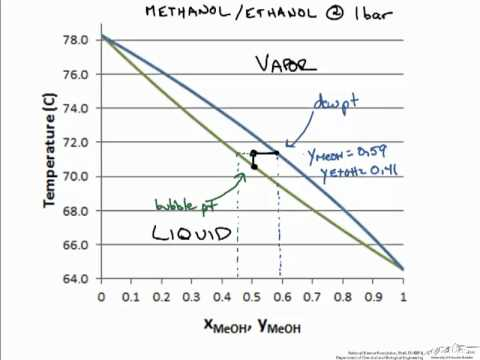

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('-XcTEknC9Aw') 

## Analysis

The basic calculations start with Raoult's law

$$P = x_A P_A^{sat}(T) + x_B P_A^{sat}(T)$$

substituting $x_B = 1-x_A$

$$P = x_A P_A^{sat}(T) + (1-x_A) P_B^{sat}(T)$$

then solving for $x_A$ and $y_A$

$$x_A = \frac{P - P_B^{sat}(T)}{P_A^{sat}(T) - P_B^{sat}(T)}$$

$$y_A = x_A\frac{P_A^{sat}(T)}{P}$$

## Plotting the Txy and Pxy Diagrams

The calculations in this notebook are for a representative system of two components, acetone and ethanol. We start by creating two functions to estimate vapor pressure for the individual species using Antoine's equation.

In [0]:
# Antoine's equations
A = 'acetone'
B = 'ethanol'

def PsatA(T):
    return 10**(7.02447 - 1161.0/(T + 224))
  
def PsatB(T):
    return 10**(8.04494 - 1554.3/(T + 222.65))
  
def xA(T,P):
    return (P - PsatB(T))/(PsatA(T) - PsatB(T))

def yA(T,P):
    return xA(T,P)*PsatA(T)/P


For convenience, we create a function that computes the boiling of a pure component given the operating pressure and a function to compute the pure component saturation pressure.

In [13]:
from scipy.optimize import brentq

def Tboil(Psat, P):
    return brentq(lambda T: Psat(T) - P, 0, 100)

print("Normal boiling point of {:s} is {:4.1f} deg C".format(A, Tboil(PsatA, 760)))
print("Normal boiling point of {:s} is {:4.1f} deg C".format(B, Tboil(PsatB, 760)))

Normal boiling point of acetone is 56.2 deg C
Normal boiling point of ethanol is 78.3 deg C


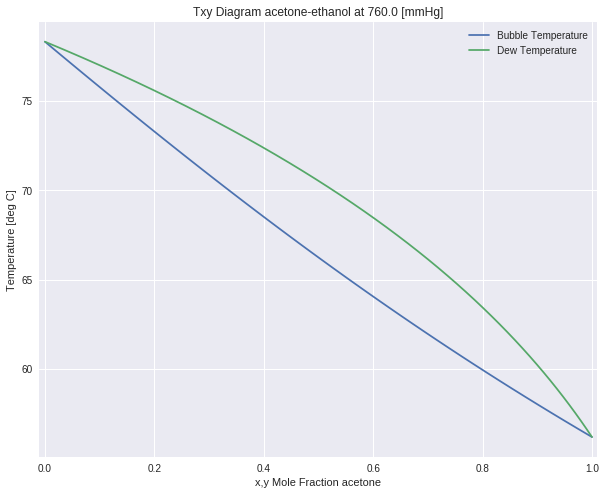

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

P = 760
T = np.linspace(Tboil(PsatA, P), Tboil(PsatB, P))

plt.figure(figsize=(10,8))
plt.plot(xA(T,P), T, yA(T,P), T)

plt.title('Txy Diagram {:s}-{:s} at {:.1f} [mmHg]'.format(A,B,P))
plt.legend(['Bubble Temperature', 'Dew Temperature'],loc='best')
plt.ylabel('Temperature [deg C]')
plt.xlabel('x,y Mole Fraction {:s}'.format(A))
plt.xlim(-0.01, 1.01);

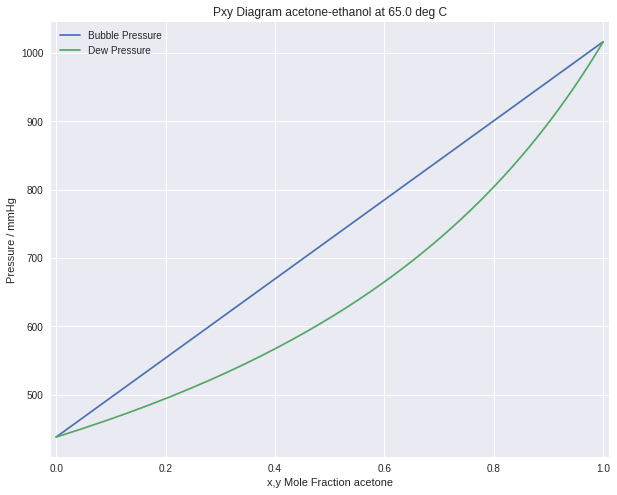

In [28]:
T = 65   # deg C
P = np.linspace(PsatB(T), PsatA(T))

plt.figure(figsize=(10,8))
plt.plot(xA(T,P), P, yA(T,P), P)

plt.title('Pxy Diagram {:s}-{:s} at {:.1f} deg C'.format(A,B,T))
plt.legend(['Bubble Pressure', 'Dew Pressure'],loc='best')
plt.ylabel('Pressure / mmHg')
plt.xlabel('x,y Mole Fraction {:s}'.format(A))
plt.xlim(-0.01, 1.01);

## xy Diagram

In [29]:
plt.figure(figsize=(8,8))

plt.plot([xA(t) for t in T], [yA(t) for t in T])
plt.axis('square')
plt.title('xy Diagram {:s}-{:s} at {:.1f} [mmHg]'.format(A,B,P))
plt.xlabel('x liquid phase mole fraction {:s}'.format(A))
plt.ylabel('y vapor phase mole fraction {:s}'.format(A))
plt.xlim(0,1)
plt.ylim(0,1)

TypeError: ignored

## Lever Rule

In [0]:
P = 760

T = np.linspace(Tboil(PsatA, P), Tboil(PsatB, P))

def xA(T):
    return (P - PsatB(T))/(PsatA(T)-PsatB(T))

def yA(T):
    return xA(T)*PsatA(T)/P

plt.plot([xA(t) for t in T], T, [yA(t) for t in T], T)

plt.title('Tx Diagram {:s}-{:s} at {:.1f} [mmHg]'.format(A,B,P))
plt.legend(['Bubble Temperature','Dew Temperature'],loc='best')
plt.ylabel('Temperature [deg C]')
plt.xlabel('x,y Mole Fraction {:s}'.format(A))
plt.xlim(0,1)
plt.grid();

Te = np.mean(T)
xe = xA(Te)
ye = yA(Te)
ze = 0.4*xe + 0.6*ye

ax = plt.axis()
plt.plot([ze,ze],[ax[2],Te],'r')
plt.plot([xe,ye],[Te,Te],'r')
plt.plot([xe,xe],[ax[2],Te],'r--',[ye,ye],[ax[2],Te],'r--')

plt.text(xe+0.01,ax[2]+0.2,'x = {:.2}'.format(xe))
plt.text(ye+0.01,ax[2]+0.2,'y = {:.2}'.format(ye))
plt.text(ze+0.01,ax[2]+1.5,'z = {:.2}'.format(ze))

plt.annotate('', (xe,Te+1), (ze,Te+1), arrowprops={'arrowstyle':'<->'})
plt.annotate('', (ze,Te+1), (ye,Te+1), arrowprops={'arrowstyle':'<->'})

plt.annotate('    L/V = (y-z)/(z-x)',(ye,Te))

plt.plot(xe,Te,'bo',ms = 10)
plt.plot(ye,Te,'go',ms = 10)
plt.plot(ze,Te,'ro',ms = 10)


## Exercises

1. Modify this notebook to create Txy and xy diagrams for an acetaldehyde/ethanol mixture.  Create an x-y diagram, and compare to the experimental data avaiable here:

S. G. D'Avila and R. S. F. Silva, "Isothermal vapor-liquid equilibrium data by total pressure method. Systems acetaldehyde-ethanol, acetaldehyde-water, and ethanol-water," Journal of Chemical & Engineering Data, vol. 15 (3), 421-424, 1970.